# Import libraries


In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import os
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load the dataset


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Btcmp M6 -- Mkt y Segmentación/CC GENERAL.csv')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Btcmp M6 -- Mkt y Segmentación/CC GENERAL.csv')

In [ ]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
data.info() #no existen id repetidos, minimum payments con nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Exploratory Data Analysis


<Axes: xlabel='TENURE', ylabel='CREDIT_LIMIT'>

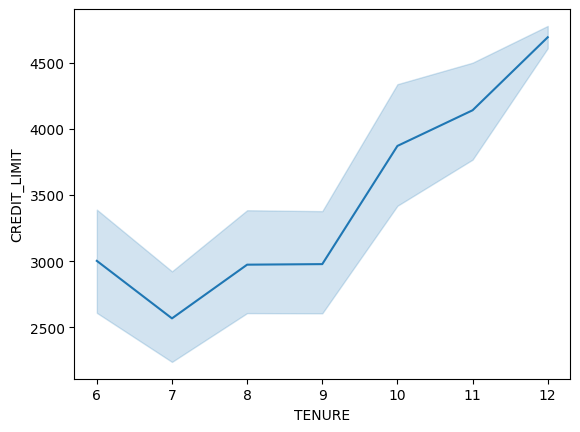

In [ ]:
sns.lineplot(data,y='CREDIT_LIMIT',x='TENURE')

<ipython-input-8-61aff3253efc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data,y='TENURE',palette='cool')


<Axes: xlabel='count', ylabel='TENURE'>

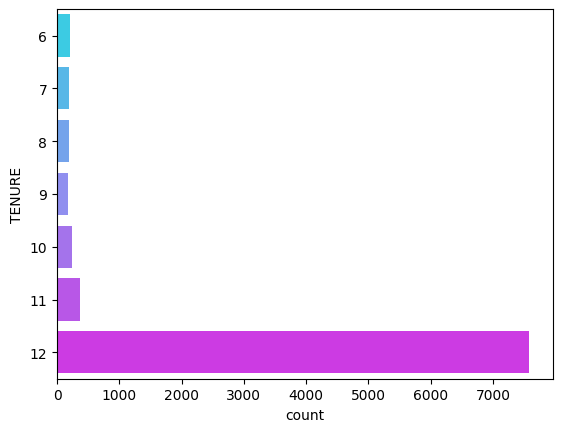

In [ ]:
sns.countplot(data,y='TENURE',palette='cool')

<Axes: xlabel='CREDIT_LIMIT', ylabel='PURCHASES_TRX'>

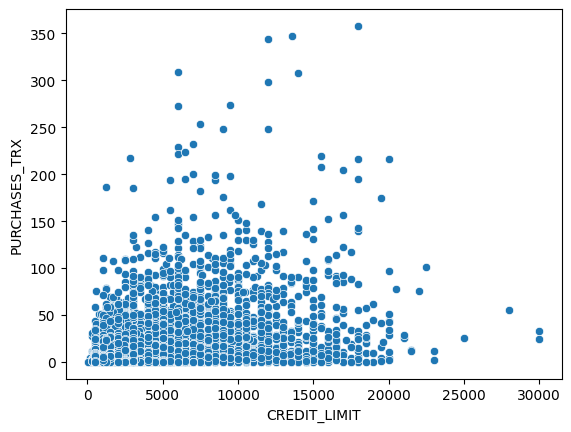

In [ ]:
sns.scatterplot(data, x='CREDIT_LIMIT',y='PURCHASES_TRX')

<Axes: xlabel='CREDIT_LIMIT', ylabel='INSTALLMENTS_PURCHASES'>

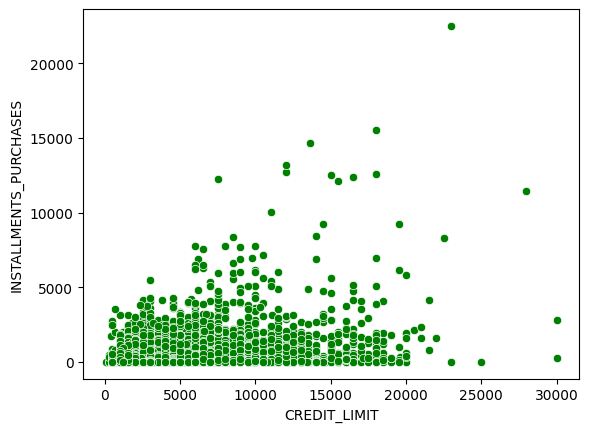

In [ ]:
sns.scatterplot(data,y='INSTALLMENTS_PURCHASES', x='CREDIT_LIMIT',color="green")

<Axes: xlabel='TENURE', ylabel='ONEOFF_PURCHASES'>

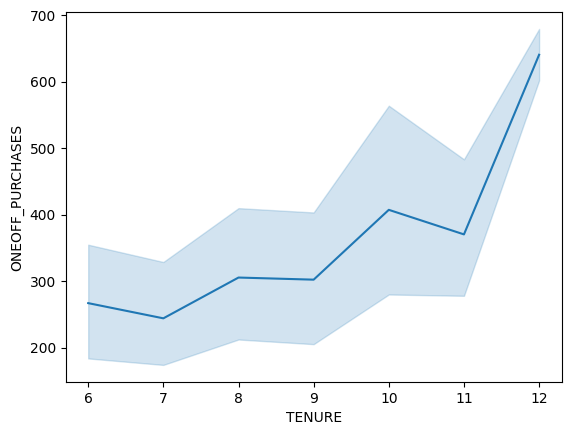

In [ ]:
sns.lineplot(data,y='ONEOFF_PURCHASES',x='TENURE')

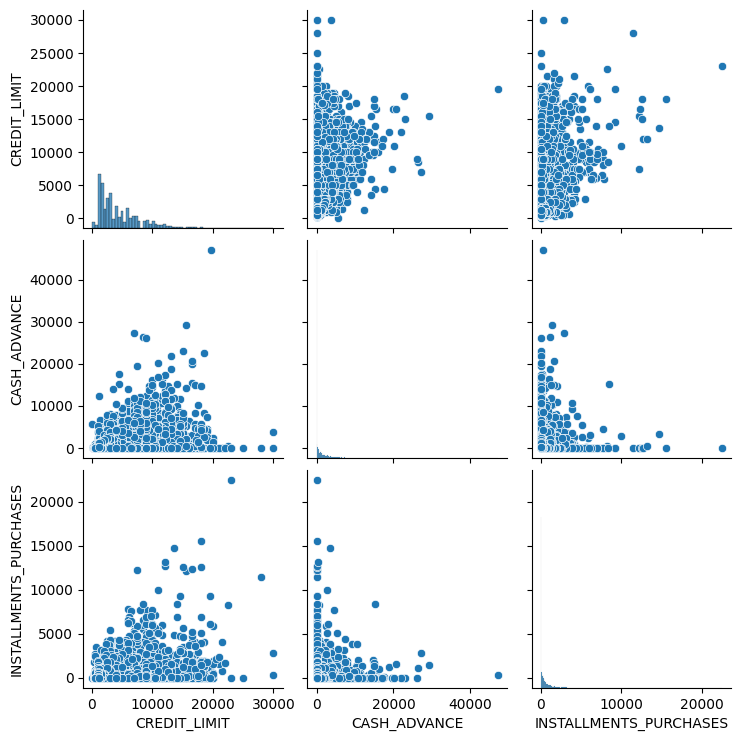

In [ ]:
sns.pairplot(data[['CREDIT_LIMIT','CASH_ADVANCE','INSTALLMENTS_PURCHASES']])

<Axes: xlabel='PRC_FULL_PAYMENT', ylabel='TENURE'>

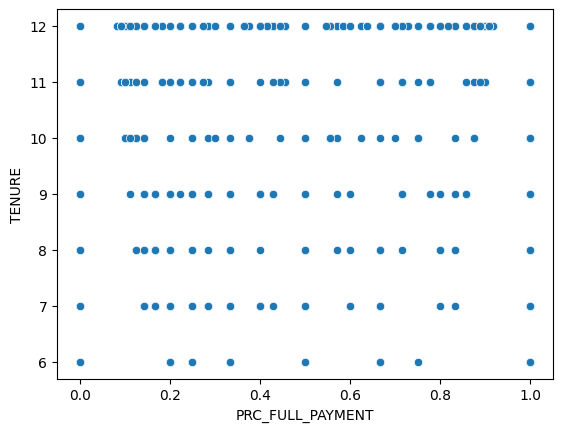

In [ ]:
sns.scatterplot(data,x='PRC_FULL_PAYMENT',y='TENURE')

In [ ]:
data.columns.values

array(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], dtype=object)

<Axes: >

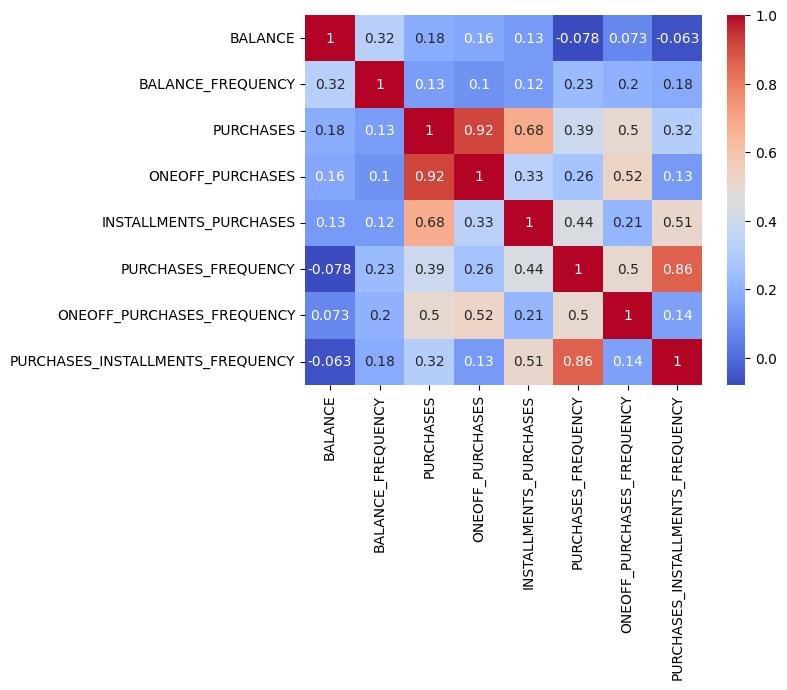

In [ ]:
values = data[['BALANCE','BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY']]
corr = values.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: >

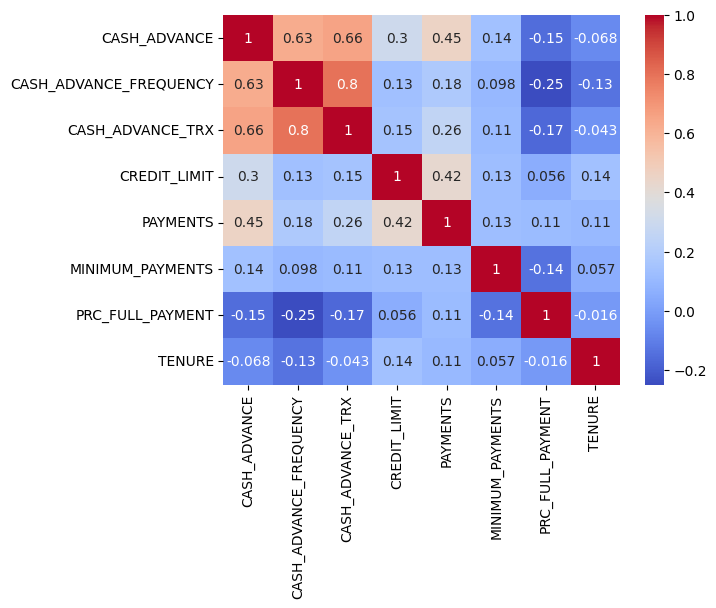

In [ ]:
values2 = data[['CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]
corr2 = values2.corr()
sns.heatmap(corr2, annot=True, cmap='coolwarm')

# Data Processing


## Data Cleaning


NaN in the MINIMUM_PAYMENTS row

In [ ]:
data[data['MINIMUM_PAYMENTS'].isna() == True]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


Imputar nulos con promedio

In [ ]:
avg_min_pymts = data['MINIMUM_PAYMENTS'].mean()

In [ ]:
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(avg_min_pymts)

NaN in the CREDIT_LIMIT row - imputar con Minimo de Credit Limit para un cliente nuevo con consumo bajo

In [ ]:
data[data['CREDIT_LIMIT'].isna() == True]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [ ]:
min_cr_lim = data[data['TENURE'] == 6]['CREDIT_LIMIT'].min()

In [ ]:
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(min_cr_lim)

## Feature Engineering
Cree al menos 2 variables nuevas


In [ ]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
data['CREDIT_LIMIT'].describe()

,CREDIT_LIMIT
count,8950.000000
mean,4494.003143
std,3638.857380
min,50.000000
25%,1600.000000
50%,3000.000000
75%,6500.000000
max,30000.000000


In [ ]:
def new_features(dataset):
  dataset['ADVANCE_ON_CREDIT']=dataset['CASH_ADVANCE']/dataset['CREDIT_LIMIT']
  dataset['PURCHASES_ON_CREDIT']= dataset['PURCHASES']/dataset['CREDIT_LIMIT']
  dataset['MIN_PYMTS_RANGE'] = pd.cut(data['MINIMUM_PAYMENTS'], [0,1000,5000,10000,800000],labels=['<1k', '1-5K', '5-10k','>10k'])
  dataset['PYMT_CURRENT_CYCLE'] = pd.cut(data['PRC_FULL_PAYMENT'], [-0.01,0.15,0.7,1],labels=['Late', 'Standard','Responsible'])
  dataset['CREDIT_RANGE'] = pd.cut(data['CREDIT_LIMIT'], [0,1500,5000,15000,30000], labels=['Low', 'Moderate', 'High','Very High'])
  return dataset

In [ ]:
new_features(data)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,ADVANCE_ON_CREDIT,PURCHASES_ON_CREDIT,MIN_PYMTS_RANGE,PYMT_CURRENT_CYCLE,CREDIT_RANGE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,1000.0,201.802084,139.509787,0.000000,12,0.000000,0.095400,<1k,Late,Low
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.920421,0.000000,1-5K,Standard,High
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,0.000000,0.103089,<1k,Late,High
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,7500.0,0.000000,864.206542,0.000000,12,0.027438,0.199867,<1k,Late,High
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,0.000000,0.013333,<1k,Late,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,1000.0,325.594462,48.886365,0.500000,6,0.000000,0.291120,<1k,Standard,Low
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,1000.0,275.861322,864.206542,0.000000,6,0.000000,0.300000,<1k,Late,Low
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,1000.0,81.270775,82.418369,0.250000,6,0.000000,0.144400,<1k,Standard,Low
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,500.0,52.549959,55.755628,0.250000,6,0.073118,0.000000,<1k,Standard,Low


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   CUST_ID                           8950 non-null   object  
 1   BALANCE                           8950 non-null   float64 
 2   BALANCE_FREQUENCY                 8950 non-null   float64 
 3   PURCHASES                         8950 non-null   float64 
 4   ONEOFF_PURCHASES                  8950 non-null   float64 
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64 
 6   CASH_ADVANCE                      8950 non-null   float64 
 7   PURCHASES_FREQUENCY               8950 non-null   float64 
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64 
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64 
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64 
 11  CASH_ADVANCE_TRX                  8950 non-null   int64 

<Axes: xlabel='CREDIT_RANGE', ylabel='count'>

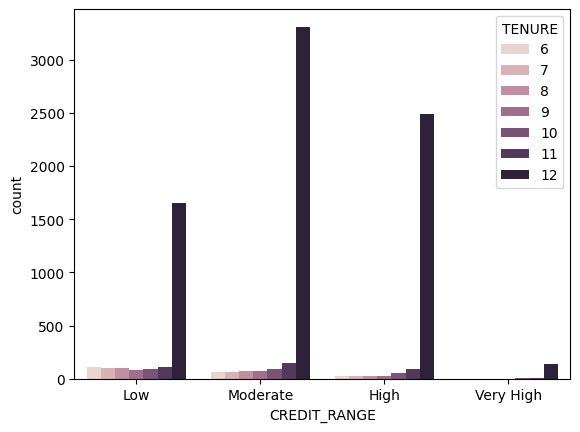

In [ ]:
sns.countplot(data,x='CREDIT_RANGE',hue='TENURE')

## Encoding


## Encoding


In [ ]:
# Identificar columnas categóricas
categorical_cols = data.select_dtypes(include=['category']).columns.tolist()
categorical_cols

['MIN_PYMTS_RANGE', 'PYMT_CURRENT_CYCLE', 'CREDIT_RANGE']

In [ ]:
# Crear un diccionario para almacenar las categorías
categories = {}

# Iterar sobre las columnas categóricas y obtener sus valores únicos
for col in categorical_cols:
    categories[col] = data[col].unique()

# Mostrar las categorías
for col, vals in categories.items():
    print(f"Columna: {col}\nValores Únicos: {vals}\n{'='*50}")


Columna: MIN_PYMTS_RANGE
Valores Únicos: ['<1k', '1-5K', '>10k', '5-10k']
Categories (4, object): ['<1k' < '1-5K' < '5-10k' < '>10k']
Columna: PYMT_CURRENT_CYCLE
Valores Únicos: ['Late', 'Standard', 'Responsible']
Categories (3, object): ['Late' < 'Standard' < 'Responsible']
Columna: CREDIT_RANGE
Valores Únicos: ['Low', 'High', 'Moderate', 'Very High']
Categories (4, object): ['Low' < 'Moderate' < 'High' < 'Very High']


In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders.one_hot import OneHotEncoder
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.target_encoder import TargetEncoder

In [ ]:
ordinal_encoder = OrdinalEncoder(cols=["MIN_PYMTS_RANGE","CREDIT_RANGE"],
                                 mapping=[{"col": "MIN_PYMTS_RANGE", "mapping": {"<1k": 1, "1-5k": 2, "5-10k": 3, ">10k": 4}},
                                          {"col": "CREDIT_RANGE", "mapping": {"Low": 1, "Moderate": 2, "High": 3, "Very High": 4}}])

In [ ]:
my_encoding = ordinal_encoder.fit(data)
my_encoding

OrdinalEncoder(cols=['MIN_PYMTS_RANGE', 'CREDIT_RANGE'],
               mapping=[{'col': 'MIN_PYMTS_RANGE', 'data_type': dtype('O'),
                         'mapping': <1k      1
1-5k     2
5-10k    3
>10k     4
dtype: int64},
                        {'col': 'CREDIT_RANGE', 'data_type': dtype('O'),
                         'mapping': Low          1
Moderate     2
High         3
Very High    4
dtype: int64}])

In [ ]:
encoded_data = my_encoding.transform(data)  # Codifica los datos originales

In [ ]:
onehot=OneHotEncoder(cols='PYMT_CURRENT_CYCLE',use_cat_names=True)

In [ ]:
encoder=onehot.fit(encoded_data)
encoded_data=encoder.transform(encoded_data)

In [ ]:
encoded_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,ADVANCE_ON_CREDIT,PURCHASES_ON_CREDIT,MIN_PYMTS_RANGE,PYMT_CURRENT_CYCLE_Late,PYMT_CURRENT_CYCLE_Standard,PYMT_CURRENT_CYCLE_Responsible,CREDIT_RANGE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,139.509787,0.000000,12,0.000000,0.095400,1.0,1,0,0,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,1072.340217,0.222222,12,0.920421,0.000000,-1.0,0,1,0,3
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,627.284787,0.000000,12,0.000000,0.103089,1.0,1,0,0,3
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,864.206542,0.000000,12,0.027438,0.199867,1.0,1,0,0,3
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,244.791237,0.000000,12,0.000000,0.013333,1.0,1,0,0,1


In [ ]:
data_entrenada = encoded_data.iloc[:, 1:]

In [ ]:
data_entrenada.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,ADVANCE_ON_CREDIT,PURCHASES_ON_CREDIT,MIN_PYMTS_RANGE,PYMT_CURRENT_CYCLE_Late,PYMT_CURRENT_CYCLE_Standard,PYMT_CURRENT_CYCLE_Responsible,CREDIT_RANGE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,139.509787,0.000000,12,0.000000,0.095400,1.0,1,0,0,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,1072.340217,0.222222,12,0.920421,0.000000,-1.0,0,1,0,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,627.284787,0.000000,12,0.000000,0.103089,1.0,1,0,0,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,864.206542,0.000000,12,0.027438,0.199867,1.0,1,0,0,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,244.791237,0.000000,12,0.000000,0.013333,1.0,1,0,0,1


Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
robust_scaler = RobustScaler()
columns_to_scale = ["BALANCE","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CASH_ADVANCE_TRX","PURCHASES_TRX","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS"]
data_entrenada[columns_to_scale] = robust_scaler.fit_transform(data_entrenada[columns_to_scale])

In [ ]:
data_entrenada.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,ADVANCE_ON_CREDIT,PURCHASES_ON_CREDIT,MIN_PYMTS_RANGE,PYMT_CURRENT_CYCLE_Late,PYMT_CURRENT_CYCLE_Standard,PYMT_CURRENT_CYCLE_Responsible,CREDIT_RANGE
0,-0.432267,0.818182,-0.248371,-0.065812,0.013657,0.000000,0.166667,0.000000,0.083333,0.000000,...,-0.282857,0.000000,12,0.000000,0.095400,1.0,1,0,0,1
1,1.209374,0.909091,-0.337489,-0.065812,-0.189912,5.784542,0.000000,0.000000,0.000000,0.250000,...,1.062541,0.222222,12,0.920421,0.000000,-1.0,0,1,0,3
2,0.842099,1.000000,0.384766,1.273231,-0.189912,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.420649,0.000000,12,0.000000,0.103089,1.0,1,0,0,3
3,0.411913,0.636364,1.062798,2.530286,-0.189912,0.184759,0.083333,0.083333,0.000000,0.083333,...,0.762355,0.000000,12,0.027438,0.199867,1.0,1,0,0,3
4,-0.028907,1.000000,-0.322542,-0.038102,-0.189912,0.000000,0.083333,0.083333,0.000000,0.000000,...,-0.131012,0.000000,12,0.000000,0.013333,1.0,1,0,0,1


## # Train model/Tune hyperparameters

# Encontrar el número adecuado de clusters usando el método del codo y Silhouette Score


In [ ]:
# Método del Codo
sse = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_entrenada)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_entrenada, kmeans.labels_))

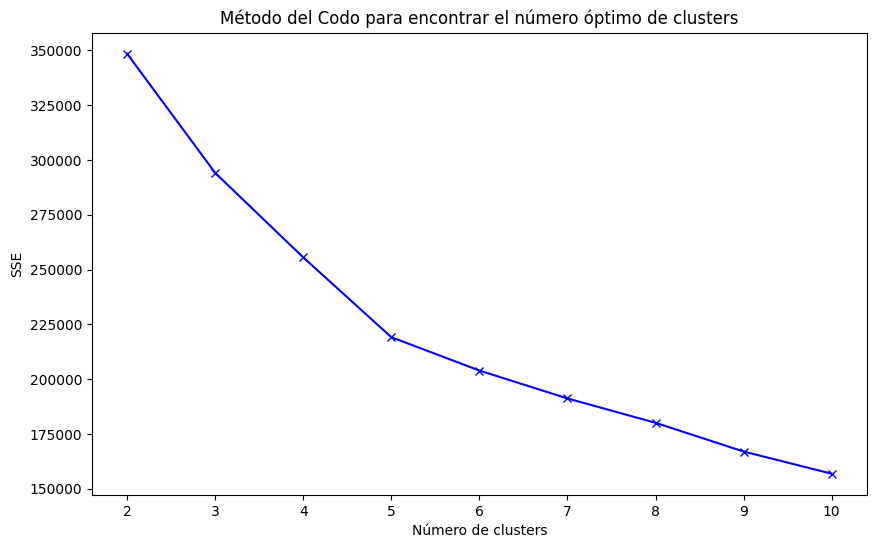

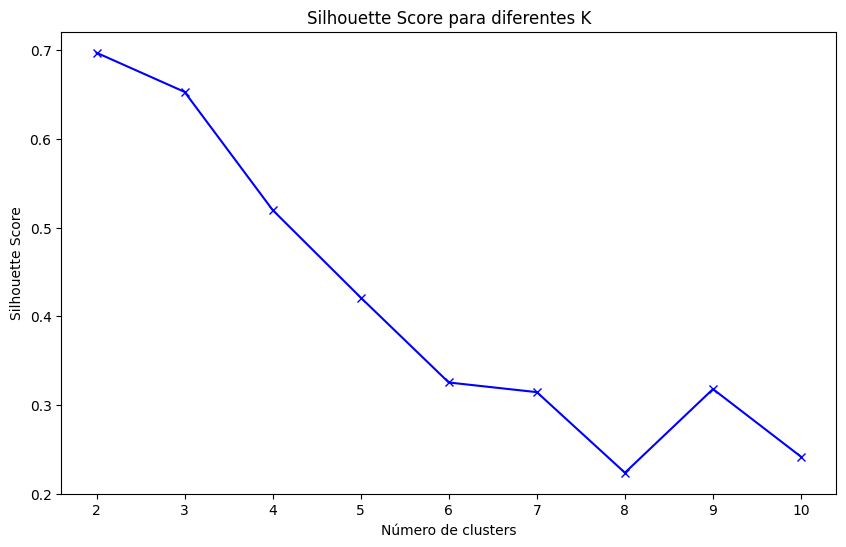

In [ ]:
# Gráfico del método del Codo
plt.figure(figsize=(10, 6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.show()


# Gráfico del Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes K')
plt.show()


# **APLICAR** **KMEANS**

In [ ]:
optimal_k = 5  # Elegido basado en los gráficos

#Se aplica el Kmeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_entrenada)

In [ ]:
#Evaluación de los clusters
kmeans_silhouette = silhouette_score(data_entrenada, kmeans_labels)
print(f"Silhouette Score para Kmeans: {kmeans_silhouette}")

Silhouette Score para Kmeans: 0.4211018042783774


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
print(data_entrenada.columns)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'ADVANCE_ON_CREDIT', 'PURCHASES_ON_CREDIT', 'MIN_PYMTS_RANGE',
       'PYMT_CURRENT_CYCLE_Late', 'PYMT_CURRENT_CYCLE_Standard',
       'PYMT_CURRENT_CYCLE_Responsible', 'CREDIT_RANGE'],
      dtype='object')


In [ ]:
cluster_cols = ['PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','PRC_FULL_PAYMENT','MIN_PYMTS_RANGE','CREDIT_RANGE']
#pca=PCA(n_components = 2)
#pca_r = pca.fit_transform(data_entrenada[cluster_cols])

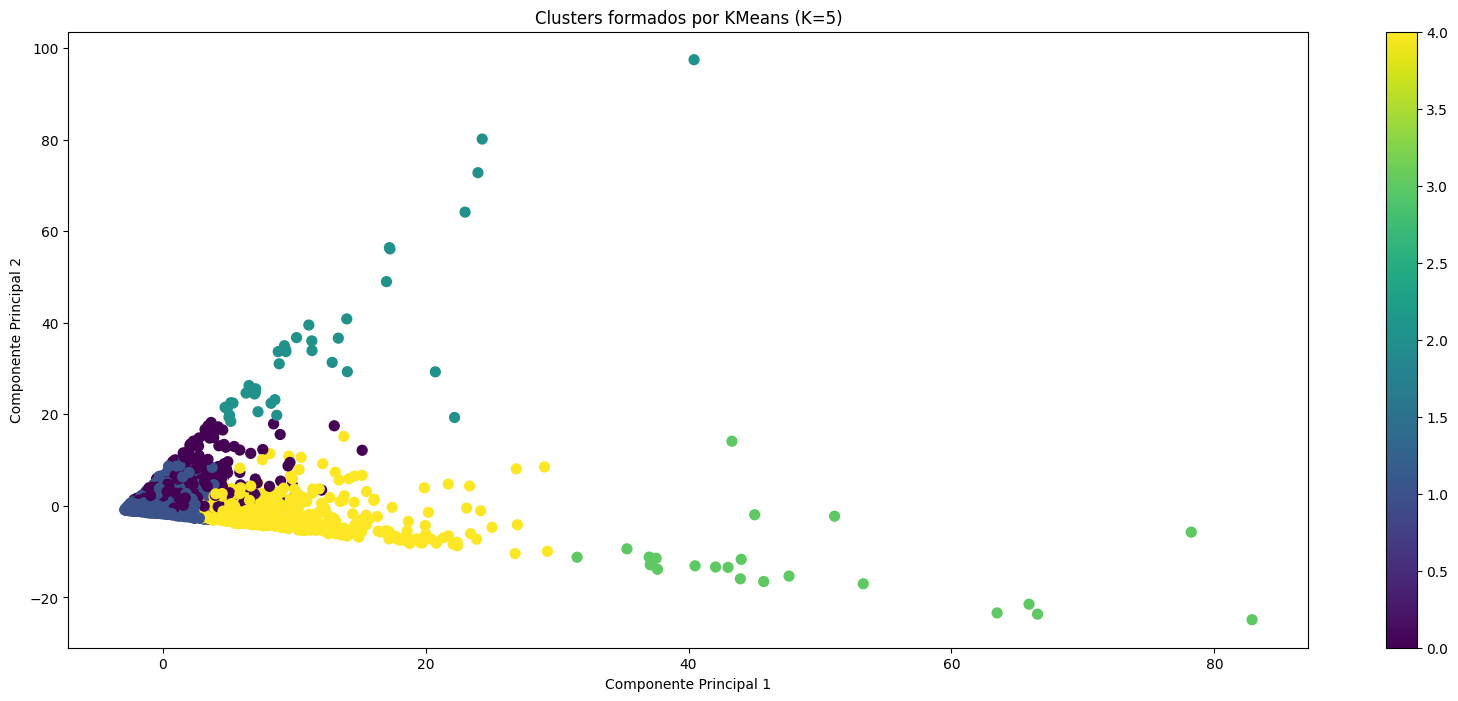

In [ ]:
# Reducir dimensiones para visualizar los clusters
pca = PCA(n_components=2)
data_entrenada_pca = pca.fit_transform(data_entrenada)

# Visualizar los clusters de KMeans
plt.figure(figsize=(20, 8))
plt.scatter(data_entrenada_pca[:, 0], data_entrenada_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title(f'Clusters formados por KMeans (K={optimal_k})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.show()

# 9. Guardar los resultados de los clusters
data_entrenada['KMeans_Cluster'] = kmeans_labels


In [ ]:
data_entrenada.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'ADVANCE_ON_CREDIT', 'PURCHASES_ON_CREDIT',
       'MIN_PYMTS_RANGE_1', 'MIN_PYMTS_RANGE_2', 'MIN_PYMTS_RANGE_3',
       'MIN_PYMTS_RANGE_4', 'PYMT_CURRENT_CYCLE_1', 'PYMT_CURRENT_CYCLE_2',
       'PYMT_CURRENT_CYCLE_3', 'CREDIT_RANGE_1', 'CREDIT_RANGE_2',
       'CREDIT_RANGE_3', 'CREDIT_RANGE_4', 'KMeans_Cluster'],
      dtype='object')

<Axes: xlabel='KMeans_Cluster'>

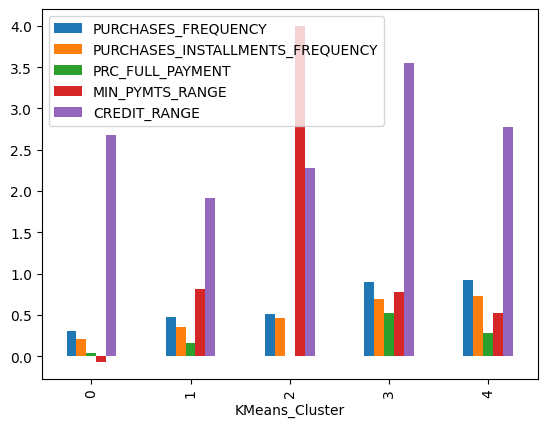

In [ ]:
data_entrenada.groupby('KMeans_Cluster')[cluster_cols].mean().plot.bar()

In [ ]:
data_entrenada["KMeans_Cluster"].value_counts()

,count
KMeans_Cluster,
1,6973
0,1210
4,706
2,39
3,22


In [ ]:
# Ejemplo DBSCAN

param_grid = {
    'eps': [0.1, 0.2, 0.3, 0.5, 0.7],  # Distancia de radio
    'min_samples': [3, 5, 10]  # Número mínimo de puntos para formar un cluster
}

# Variable para almacenar los mejores resultados
best_score = -1
best_params = { }

# Búsqueda manual (Grid Search)
for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        # Definir el modelo con los parámetros actuales
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)

        # Ajustar el modelo
        labels = dbscan.fit_predict(data_entrenada)

        # Verificar que haya clusters generados, ya que DBSCAN puede generar ruido (label -1)
        if len(set(labels)) > 1:  # Necesitamos al menos 2 clusters para calcular el Silhouette Score
            # Evaluar el modelo con Silhouette Score
            score = silhouette_score(data_entrenada, labels)

            # Guardar si es el mejor score
            if score > best_score:
                best_score = score
                best_params = {
                    'eps': eps,
                    'min_samples': min_samples
                }

# Imprimir los mejores parámetros y el mejor score
print(f"Mejores Parámetros: {best_params}")
print(f"Mejor Silhouette Score: {best_score:.4f}")

Mejores Parámetros: {'eps': 0.7, 'min_samples': 10}
Mejor Silhouette Score: -0.2823


In [ ]:
best_model = KMeans(random_state=42,n_clusters=k)
best_model = KMedoids(random_state=42,n_clusters=k)

best_model = DBSCAN(best_params)
best_model = AgglomerativeClustering(best_params)

In [ ]:
#best_model.fit(data_entrenada)

In [ ]:
data_entrenada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

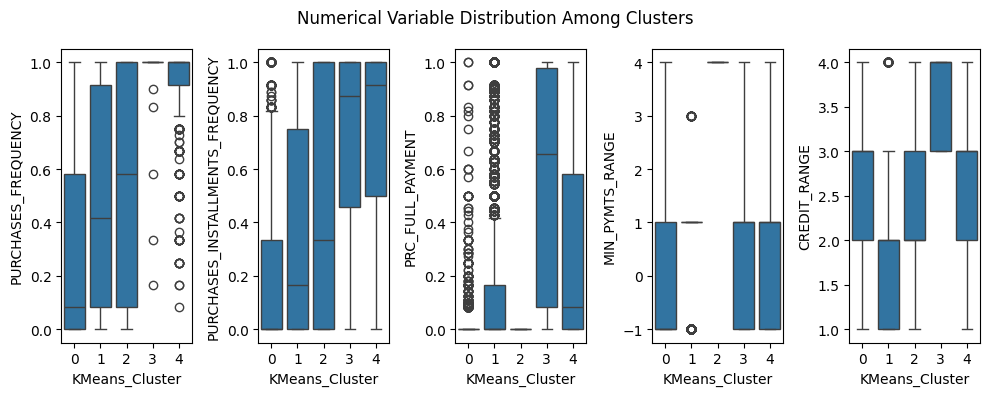

In [ ]:
# Numerical variable distribution among clusters
fig, axs = plt.subplots(1, 5, figsize=(10, 4))

for i in range(len(cluster_cols)):
    sns.boxplot(data=data_entrenada, x='KMeans_Cluster', y=cluster_cols[i], ax=axs[i])
fig.suptitle('Numerical Variable Distribution Among Clusters')
plt.tight_layout()
plt.show()

In [ ]:
df[data_entrenada['KMeans_Cluster']==1]['CREDIT_LIMIT'].describe()

,CREDIT_LIMIT
count,6972.000000
mean,3600.770738
std,2924.391854
min,150.000000
25%,1500.000000
50%,2500.000000
75%,5000.000000
max,25000.000000


Cluster 0: Clientes con baja frecuencia de compra en cuotas, rango de crédito entre 5,000
 a 10,000 (se considera High)

Cluster 1: Frecuencia media de compra en cuotas, rango de crédito menor que el cluster anterior

Cluster 2: **Alta frecuencia de compra en cuotas, casi nula frecuencia de pago completo acumula deuda generando intereses, rango de crédito similar a cluster 0**

Cluster 3: Alta frecuencia de compra en cuotas y pagos completos, limite de credito Very High

Cluster 4: Menor frecuencia de compra pero suele realizarfull payments, rango de crédito High


